In [ ]:
# This script does the following...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from matplotlib.ticker import MultipleLocator

In [2]:
# This is the 2024 'Sustainable Development Index' data time series 1990 to 2022 for 163 countries
# Source: https://www.sustainabledevelopmentindex.org/time-series
# Author and original work: Hickel, Jason. 2020. “The Sustainable Development Index: Measuring the Ecological Efficiency of Human Development in the Anthropocene,”
# It includes spread sheets covering: SDI, Life Expectancy (years), Expected Years of Schooling, ->
# Mean Years of Schooling, GNI pcap. const 2017$ PPP, CO2 emissions per cap (tonnes), Mat. Footprint pcap (tonnes)
dataSDI = pd.ExcelFile('SDI+and+Components+(1990-2022).xlsx')

# Creating seperat dataframe for each socio-ecological indicator

dfSDI = pd.read_excel(dataSDI, 'SDI')
dfSDIT = dfSDI.T

dfLE = pd.read_excel(dataSDI, 'Life Expectancy (years)')
dfLET = dfLE.T

dfES = pd.read_excel(dataSDI, 'Expected Years of Schooling')
dfEST = dfES.T

dfMS = pd.read_excel(dataSDI, 'Mean Years of Schooling')
dfMST = dfMS.T

dfGNI = pd.read_excel(dataSDI, 'GNI pcap. const 2017$ PPP')
dfGNIT = dfGNI.T

# The data for consumption-based CO2 emissions is derived from EORA-PRIMAP. 
dfCO2 = pd.read_excel(dataSDI, 'CO2 emissions pcap (tonnes)')
dfCO2T = dfCO2.T

#The data for material footprint is derived from the UN International Resource Panel Global Material Flows database.
dfMF = pd.read_excel(dataSDI, 'Mat. Footprint pcap (tonnes)')
dfMFT = dfMF.T

In [3]:
# This is the 2024 'Domenstic Material Consumption' data time series 1970 to 2024 for 163 countries (Global Material Flows Database)
# Source: https://www.resourcepanel.org/global-material-flows-database
# Institutions involved developing: Csiro, WU Vieanna, BOKU Vianna, Nagoya University
# Whole Database constitutes of typical MEFA indicators (up to 13 Material-Flows in tonnes per year), MF Indicator (MRIO) and Economic Indicators GDP (const.). 
# Critical Intensities (DMC/GDP ect. ) can be found there.
# For this analysis we download DMC/cap
dfDMC = pd.read_csv("mfa_dmc_pc_CRI.csv")
dfDMCT = dfDMC.T

In [4]:
#Here we set the Functions to calculate the Development Index and Eceological Impact Index (Hickl, 2020)

def LEI(x):
    '''Function for the Life Expectancy Index. Takes as variable: Life Expectancy (years)'''
    return (x - 20)/(85-20)

def EI(x,y):
     '''Function for the Education Index. Variable: Mean Years of Schooling and Expected Years of Schooling'''
     return (x + y)/2

def II(x):
    '''Function for the Income Index. Variable: GNI pcap. const 2017$ PPP'''
    return (np.log(x) - np.log(100))/(np.log(20000)-np.log(100))

def DI(a,x,y,z):
    '''Function for the Development Index. Takes: Life Expectancy (years); Mean Years of Schooling; Expected Years of Schooling; Variable: GNI pcap. const 2017$ PPP'''
    return (LEI(a)*EI(x,y)*II(z))**(1/3)


def EII(s,a,x,y,z):
    '''Ecological Impact Index. Is calculated indirectly (because CO2 Planetary Boundaries data is missing). Takes: SDI and DI(a,x,y,z) '''
    return DI(a,x,y,z)/s

In [5]:
# The DI is iterated in a for loop, handing out an numpy array 'DevIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
# When going for a crosscountry analysis, this needs to be fixed.
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [DI(dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('Somthing went wrong with the loop range')
DevIndCRI = np.array(lst)

In [6]:
# The EII is iterated in a for loop, handing out an numpy array 'EcoImpIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [EII(dfSDIT.iat[x,37],dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('wrong len')
EcoImpIndCRI = np.array(lst)

In [41]:
# Creating a numpy arry for DMC/cap 'DMC'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]]
     else:
        print('wrong len')
DMC = np.array(lst)


In [42]:
# Creating a numpy arry for MF/cap 'MF'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfMFT.iat[x,37]]
     else:
        print('wrong len')
MF = np.array(lst)

In [ ]:
# Creating a numpy array for the Externalization Intensity DMC/MF
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]/dfMFT.iat[x,37]]
     else:
        print('wrong len')
DMCoverMF = np.array(lst)

In [ ]:
# Creating numpy arrays for the Drivers of SDI
MFoverEI = dfMFT[37][2:]/EcoImpIndCRI # Ecological Material Efficiency, Consumption based
DMCoverMF = DMCoverMF # Rate of economic internalization. It sets the ratio between DMC and MF. It states how much of the economic activity is externalized.
DIoverDMC = np.array((DevIndCRI/dfDMCT.iloc[24:57].T).T) # Social Material Intensity. It states how efficient social ends are met by given ressource input.

C:\Users\admin\AppData\Local\Temp\ipykernel_19072\1472245286.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(dfSDIT[37][1]) # This is a last double Check on which country was choosen.


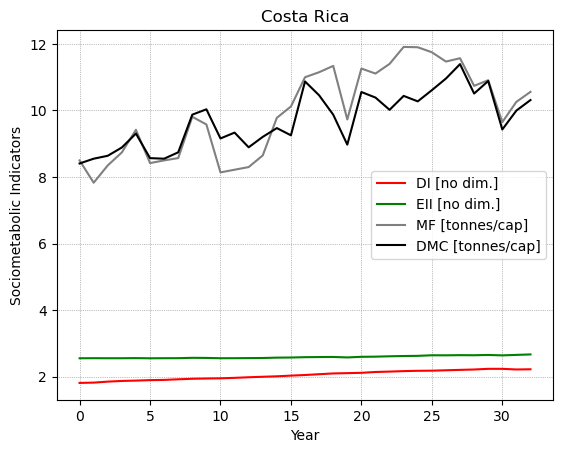

In [47]:
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(DevIndCRI, label='DI [no dim.]', color='red')
plt.plot(EcoImpIndCRI, label='EII [no dim.]', color='green')
plt.plot(MF, label='MF [tonnes/cap]', color='gray')
plt.plot(DMC, label='DMC [tonnes/cap]', color='black')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sociometabolic Indicators')
plt.title(dfSDIT[37][1]) # This is a last double Check on which country was choosen.
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19072\1293598591.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(dfSDIT[37][1]) # This is a last double Check on which country was choosen.


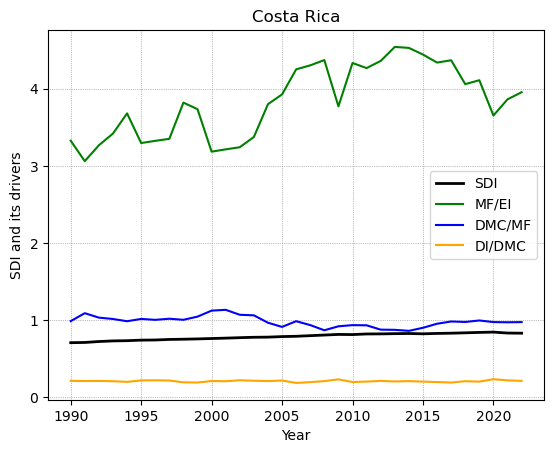

In [27]:
# Plotting the SDI and Drivers for Costa Rica from 1990 to 2022

plt.plot(dfSDIT[37][2:], label='SDI', color='black', linewidth=2)
plt.plot(MFoverEI, label='MF/EI', color='green')
plt.plot(DMCoverMF, label='DMC/MF', color='blue')
plt.plot(DIoverDMC, label='DI/DMC', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('SDI and its drivers')
plt.title(dfSDIT[37][1]) # This is a last double Check on which country was choosen.
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

In [37]:
# See comments on the Results in the last line

C:\Users\admin\AppData\Local\Temp\ipykernel_19072\880228389.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)
C:\Users\admin\AppData\Local\Temp\ipykernel_19072\880228389.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(MFoverEI/MFoverEI[0]*100-100, label='(MF/EII)/3.32', color='green')
C:\Users\admin\AppData\Local\Temp\ipykernel_19072\880228389.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

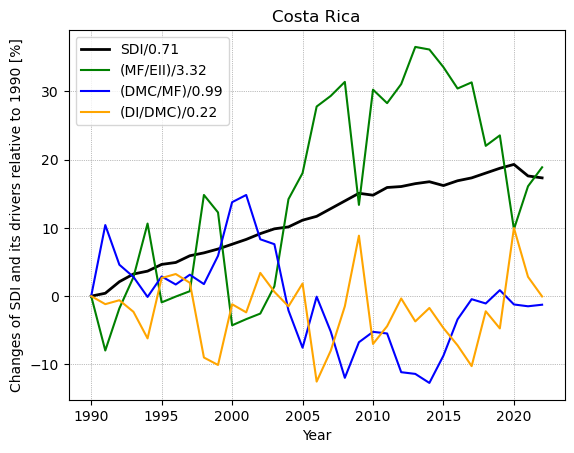

In [48]:
# Plotting the RELATIVE SDI and RELATIVE Drivers for Costa Rica from 1990 to 2022. Origin 1990.
# This is similar to Kaya-Identity depiction (see https://en.wikipedia.org/wiki/Kaya_identity) and a basic form of Index Decomposition
# SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)

plt.plot(dfSDIT[37][2:]/dfSDIT[37][2]*100-100, label='SDI/0.71', color='black', linewidth=2)
plt.plot(MFoverEI/MFoverEI[0]*100-100, label='(MF/EII)/3.32', color='green')
plt.plot(DMCoverMF/DMCoverMF[0]*100-100, label='(DMC/MF)/0.99', color='blue')
plt.plot(DIoverDMC/DIoverDMC[0]*100-100, label='(DI/DMC)/0.22', color='orange')

# Set a distance of 5 years for the time axes ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Changes of SDI and its drivers relative to 1990 [%]')
plt.title(dfSDIT[37][1]) # This is a last double Check on which country was choosen.
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()

In [ ]:
# Comments on the results

# Indicators:
# Sustainable Development Indicator (SDI); Development Indicator (DI); Ecological Impact Indicator (EII)
# SDI = DI / EII
# Decompostion is done in Kaya-Identity Manner: SDI = DI/EII = (DI/DMC)*(DMC/MF)*(MF/EII)
# Material Footprint (MF), Domestic Material Consumption (MC)

# Intensities and Efficiencies (Drivers):
# Ecological Material Efficiency (MF/EII)
# Economic Internalization Rate (DMC/MF)

# Results and Interpretation:
# By examening the Sociometabolic indicators, the DI (Development Indicator) appears responsible for the better SDI. 
# The EII stays almost constant over time. 
# By introducing MFA indicators through a Kaya-Identity-style index decomposition 
# we can gain understanding of the materialistic reallities behind a better DI and constant EII.
# The gain of Development is sustained by a steadily rising demand of material requierements (DMC). 
# The steadily increasing DI does hence not seem to belong to more efficient use of material inputs, but rather an expansion of infrastructure, 
# insuring social services, such as health care and education, which might secure access to a broader population share. 
# Because service quality rises, as well as DMC, 'Social Material Intensity' stays overall similiar, 
# and only fluctuates +-10% around the original value of 1990.
# Overall, Costa Rica appears to externalizes only little economic activity, (DMC/MF) stays within max +-15% of change rate from no externalization pressure.
# That does not mean, that Costa Rica would not take part in global trade. 
# Instead it means, that its material use is domestically (production based) of similar magnitude then its material footprint.
#--------
# For heavy exteranlization one could expect a bigger difference, since heavy industries (emmision intensive) are u....
#---------
# Most of SDI appears driven by the Ecological Material Efficiency (MF/EII).
# So at this point it appears, that the decarbonisation of the Material Footprint made up most of the gain in the SDI.

# Future Work
# Go into Detail of MFA indicators
# 

# Stylized Facts
# - MF and DMC have a strong correlation over the whole period.
# - (ME/EI) and (DMC/MF) have an overal strong correlation (not yet calculated, by appearence)
#   - this results from MF fluctuating in greater amplitude then EII and DMC. 
# - There appear roughly two phases: 
#   (1) 1990 - 2003: SDI appears mainly driven by (MF/EI) (Ecological Material Efficiency) and (DMC/MF) (Economic Internalization)
#   (2) 2003 - 2022: SDI appears mainly driven by (MF/EI) (Ecological Material Efficiency) 
